<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/C%C3%B3pia_de_Day_2_LLM_Search_WEB_e_APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

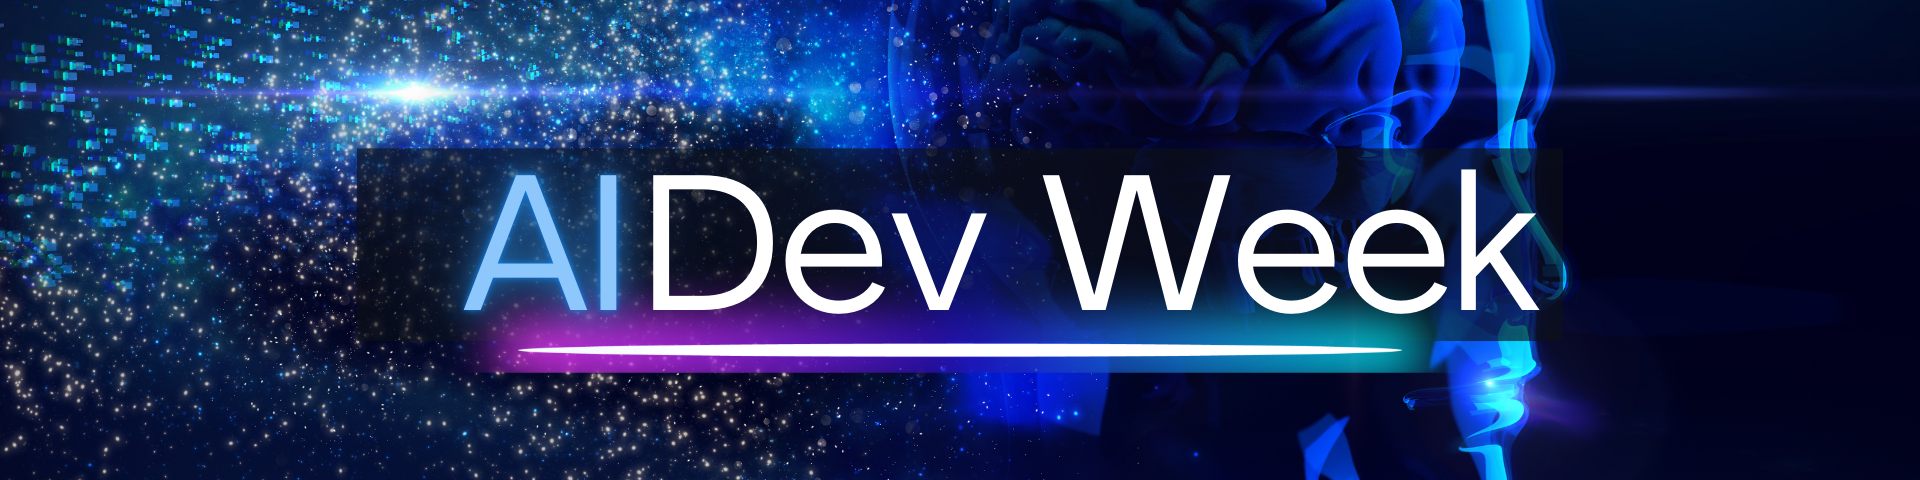

# <font color = Blue> DAY 2 - Search Web API's com LLM + Phidata


#Agentes de Pesquisa

In [ ]:
!pip install exa_py

In [ ]:
from exa_py import Exa
import os
import textwrap
import openai
from google.colab import userdata

# Definindo a chave da API OpenAI e EXA
openai.api_key = userdata.get("OPENAI_API_KEY")
EXA_API_KEY = userdata.get('EXA_API_KEY')

# Verificação para garantir que a chave de API do Exa foi carregada
if EXA_API_KEY is None:
    raise ValueError("A chave EXA_API_KEY não foi encontrada no ambiente. Verifique se foi configurada corretamente.")

# Inicializando o Exa com a chave de API
exa = Exa(api_key=EXA_API_KEY)

# Etapa 1: Buscar informações de players do mercado de nutrição bovina no Brasil
search_term = "mercado de nutrição bovina no Brasil"  # Palavra-chave para a busca
search_response = exa.search_and_contents(
        search_term,
        highlights={"num_sentences": 2},
        num_results=10)

companies = search_response.results

# Exibir títulos e URLs das empresas encontradas
urls = {}
for c in companies:
    print(c.title + ':' + c.url)

# Etapa 2: Analisando uma das empresas encontradas
c = companies[0]  # Pega a primeira empresa
all_contents = ""
search_response = exa.search_and_contents(
  c.url,  # URL da empresa
  type="keyword",
  num_results=5
)
research_response = search_response.results

for r in research_response:
    all_contents += r.text

# Definição da função para chamar
tools = [
    {
        "type": "function",
        "function": {
            "name": "get_delivery_date",
            "description": "Get the delivery date for a customer's order.",
            "parameters": {
                "type": "object",
                "properties": {
                    "order_id": {
                        "type": "string",
                        "description": "The customer's order ID.",
                    },
                },
                "required": ["order_id"],
                "additionalProperties": False,
            },
        }
    }
]

# Etapa 3: Definindo o sistema de mensagem para gerar relatório com GPT-4
SYSTEM_MESSAGE = """
Você é um assistente sênior escrevendo um relatório de pesquisa sobre o mercado de nutrição bovina no Brasil.
Resuma as informações do usuário em múltiplos parágrafos.
Seja extremamente conciso, profissional e o mais factual possível.

1. O primeiro parágrafo deve ser uma introdução e resumo da empresa.
2. O segundo parágrafo deve incluir os prós e contras da empresa.
3. O terceiro parágrafo deve fornecer uma análise do tamanho do mercado de nutrição bovina no Brasil,
principais players e sugestões para melhorar a competitividade.
"""

# Mensagens a serem passadas para o modelo
messages = [
    {"role": "system", "content": SYSTEM_MESSAGE},
    {"role": "user", "content": all_contents},
]

# Correção do método: usando 'chat.completions.create'
response = openai.chat.completions.create(
    model="gpt-4o-mini",  # Substitua com o modelo desejado
    messages=messages,
    tools=tools
)

summary = response.choices[0].message.content

# Exibir o resumo
print(f"Resumo para {c.url}:")
print(summary)


Brazilian Animal Feed Additives Market:https://www.transparencymarketresearch.com/brazilian-animal-feed-additives-market.html
Homepage:https://www.bionutrientes.com.br/en/home/
NUTRIDEAL – Especialistas em Nutrição Animal:https://nutrideal.com.br/
Aqui você encontra tudo sobre pecuária de corte:https://www.beefpoint.com.br/
Multitrato – Nutrição Animal – Multitrato – Nutrição Animal:https://www.multitrato.com.br/
Abinpet | Home:https://abinpet.org.br/
Biofórmula – Mais peso para o seu rebanho:https://www.bioformula.ind.br/
Nutrição Animal para Gado de Leite, Gado de Corte, Aves, Capriovinos, Equídeos:https://nutroeste.com.br/
Nutritime – Nutri-time:https://www.nutritime.com.br/
Brazil: Livestock and Products Annual:https://www.fas.usda.gov/data/brazil-livestock-and-products-annual-7
Resumo para https://www.transparencymarketresearch.com/brazilian-animal-feed-additives-market.html:
O mercado de aditivos para alimentação animal no Brasil tem visto um crescimento significativo, impulsiona

In [ ]:
from exa_py import Exa
import os
import textwrap
import openai
from google.colab import userdata
from IPython.display import display, Markdown

# Definindo a chave da API OpenAI e EXA
openai.api_key = userdata.get("OPENAI_API_KEY")
EXA_API_KEY = userdata.get('EXA_API_KEY')

# Verificação para garantir que a chave de API do Exa foi carregada
if EXA_API_KEY is None:
    raise ValueError("A chave EXA_API_KEY não foi encontrada no ambiente. Verifique se foi configurada corretamente.")

# Inicializando o Exa com a chave de API
exa = Exa(api_key=EXA_API_KEY)

# Etapa 1: Buscar informações de players do mercado de nutrição bovina no Brasil
search_term = "mercado de nutrição bovina no Brasil"  # Palavra-chave para a busca
search_response = exa.search_and_contents(
        search_term,
        highlights={"num_sentences": 2},
        num_results=15)

companies = search_response.results

# Exibir títulos e URLs das empresas encontradas
urls = {}
for c in companies:
    print(c.title + ':' + c.url)

# Etapa 2: Iterar sobre todas as empresas encontradas
for c in companies:
    all_contents = ""
    search_response = exa.search_and_contents(
        c.url,  # URL da empresa
        type="keyword",
        num_results=5
    )
    research_response = search_response.results

    for r in research_response:
        all_contents += r.text

    # Definição da função para chamar (no caso de function calling, se necessário)
    tools = [
        {
            "type": "function",
            "function": {
                "name": "get_delivery_date",
                "description": "Get the delivery date for a customer's order.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "order_id": {
                            "type": "string",
                            "description": "The customer's order ID.",
                        },
                    },
                    "required": ["order_id"],
                    "additionalProperties": False,
                },
            }
        }
    ]

    # Etapa 3: Definindo o sistema de mensagem para gerar relatório com GPT-4
    SYSTEM_MESSAGE = """
    Você é um assistente sênior escrevendo um relatório de pesquisa sobre o mercado de nutrição bovina no Brasil.
    Resuma as informações do usuário em múltiplos parágrafos.
    Seja extremamente conciso, profissional e o mais factual possível.

    1. O primeiro parágrafo deve ser uma introdução e resumo da empresa.
    2. O segundo parágrafo deve incluir os prós e contras da empresa.
    3. O terceiro parágrafo deve fornecer uma análise do tamanho do mercado de nutrição bovina no Brasil,
    principais players e sugestões para melhorar a competitividade.
    """

    # Mensagens a serem passadas para o modelo
    messages = [
        {"role": "system", "content": SYSTEM_MESSAGE},
        {"role": "user", "content": all_contents},
    ]

    # Correção do método: usando 'chat.completions.create'
    response = openai.chat.completions.create(
        model="gpt-4o-mini",  # Substitua com o modelo desejado
        messages=messages,
        tools=tools
    )

    # Correção para obter o conteúdo da resposta
    summary = response.choices[0].message.content
    summary_lines = summary.splitlines()

    # Garantir que cada seção tenha conteúdo
    introduction = summary_lines[0] if len(summary_lines) > 0 else "Informação não disponível"
    pros_cons = summary_lines[1] if len(summary_lines) > 1 else "Informação não disponível"
    market_analysis = summary_lines[2] if len(summary_lines) > 2 else "Informação não disponível"
    recommendations = summary_lines[3] if len(summary_lines) > 3 else "Informação não disponível"

    # Exibir o resumo formatado em Markdown para cada empresa
    formatted_summary = f"""
    ## Relatório de Empresa: {c.title}

    **URL da Empresa**: [{c.url}]({c.url})

    ### Introdução e Resumo da Empresa:
    {introduction}

    ### Prós e Contras:
    {pros_cons}

    ### Análise do Mercado de Nutrição Bovina no Brasil:
    {market_analysis}

    ### Recomendações:
    {recommendations}
    """

    # Exibir o resumo formatado como Markdown
    display(Markdown(formatted_summary))


Crescimento na produção de rações impulsiona o setor de nutrição ...:https://girodoboi.canalrural.com.br/pecuaria/mercado-da-carne/crescimento-na-producao-de-racoes-impulsiona-o-setor-de-nutricao-animal/
Setor de ração animal do Brasil vê alta de 2,4% na produção em 2024:https://forbes.com.br/forbesagro/2024/04/setor-de-racao-animal-do-brasil-ve-alta-de-24-na-producao-em-2024/
Mercado de nutrição animal deveria ser o dobro, diz presidente da ...:https://agfeed.com.br/negocios/mercado-de-nutricao-animal-deveria-ser-o-dobro-diz-presidente-da-connan-e-da-asbram/
Mercado de ração para gado- Tamanho e tendências da indústria:https://www.mordorintelligence.com/pt/industry-reports/cattle-feed-market
Mercado de ração animal: Sindirações detalha os resultados de ...:https://girodoboi.canalrural.com.br/pecuaria/mercado-de-racao-animal-sindiracoes-detalha-os-resultados-de-2023-e-as-projecoes-para-2024/
Alimentação bovina no Brasil: quais são os desafios? - Casale:https://casale.com.br/en/blog/des


    ## Relatório de Empresa: Crescimento na produção de rações impulsiona o setor de nutrição ...

    **URL da Empresa**: [https://girodoboi.canalrural.com.br/pecuaria/mercado-da-carne/crescimento-na-producao-de-racoes-impulsiona-o-setor-de-nutricao-animal/](https://girodoboi.canalrural.com.br/pecuaria/mercado-da-carne/crescimento-na-producao-de-racoes-impulsiona-o-setor-de-nutricao-animal/)

    ### Introdução e Resumo da Empresa:
    O Sindicato Nacional da Indústria de Alimentação Animal (Sindirações) relatou um sólido desempenho do setor de nutrição bovina no Brasil nos primeiros seis meses de 2023, com a produção de rações acumuladas atingindo 42 milhões de toneladas, representando um crescimento significativo. A ração destinada a bovinos de corte cresceu de 2,49 milhões para 2,62 milhões de toneladas, especialmente no segundo trimestre. Para o ano seguinte, o Sindirações projeta um aumento de 4,3% na pecuária de corte, almejando 6,8 milhões de toneladas de rações comercializadas.

    ### Prós e Contras:
    

    ### Análise do Mercado de Nutrição Bovina no Brasil:
    Os pontos positivos da empresa incluem a trajetória crescente na produção de ração e a adaptação às demandas de mercado, o que sugere uma forte posição competitiva. No entanto, o setor enfrenta desafios, como a volatilidade nos preços da arroba do boi e a sensibilidade a fatores econômicos e internacionais que podem afetar o consumo de proteínas. Além disso, a produção de leite mostrou um desempenho negativo, refletindo os impactos das importações e da redução de preços.

    ### Recomendações:
    
    


    ## Relatório de Empresa: Setor de ração animal do Brasil vê alta de 2,4% na produção em 2024

    **URL da Empresa**: [https://forbes.com.br/forbesagro/2024/04/setor-de-racao-animal-do-brasil-ve-alta-de-24-na-producao-em-2024/](https://forbes.com.br/forbesagro/2024/04/setor-de-racao-animal-do-brasil-ve-alta-de-24-na-producao-em-2024/)

    ### Introdução e Resumo da Empresa:
    O mercado de nutrição bovina no Brasil apresenta perspectivas de crescimento, impulsionado por uma melhora nos preços dos grãos, que têm contribuído para a diminuição dos custos de alimentação animal. O Sindicato Nacional da Indústria de Alimentação Animal (Sindirações) projetou um aumento de 2,4% na produção total de rações em 2024, alcançando 88,3 milhões de toneladas. Apesar de um desempenho abaixo das expectativas em 2023, com uma alta de apenas 1%, o setor se mantém otimista com relação ao fornecimento adequado de insumos, mesmo diante de desafios, como a quebra de safra de milho e soja.

    ### Prós e Contras:
    

    ### Análise do Mercado de Nutrição Bovina no Brasil:
    Entre os pontos positivos, destaca-se a redução no custo da alimentação para frangos e suínos devido à queda nos preços de milho e soja. No entanto, o segmento de ração para bovinos enfrentou uma leve retração com a redução nas vendas de sal mineral. O crescimento nas rações específicas para bovinos de corte e leite, bem como a capacidade de adaptação do setor às variações climáticas e de mercado, são aspectos que se destacam positivamente. Em contrapartida, os desafios incluem a concorrência crescente entre as indústrias, a pressão ambiental e o impacto da desaceleração do consumo global.

    ### Recomendações:
    
    


    ## Relatório de Empresa: Mercado de nutrição animal deveria ser o dobro, diz presidente da ...

    **URL da Empresa**: [https://agfeed.com.br/negocios/mercado-de-nutricao-animal-deveria-ser-o-dobro-diz-presidente-da-connan-e-da-asbram/](https://agfeed.com.br/negocios/mercado-de-nutricao-animal-deveria-ser-o-dobro-diz-presidente-da-connan-e-da-asbram/)

    ### Introdução e Resumo da Empresa:
    Fernando Penteado Cardoso Neto, herdeiro de uma renomada família no agronegócio, preside a Connan, uma empresa de nutrição animal com sede em Boituva, São Paulo. A Connan, que fatura R$ 200 milhões, oferece produtos voltados para gado de corte e leite, equinos e ovinos. Além de seu papel na Connan, Cardoso Neto também é presidente da Associação Brasileira das Indústrias de Suplementos Minerais (Asbram). Ele observa que 2023 foi desafiador, com uma queda de 7% em volume e faturamento no setor, refletindo a retração de preços do gado e a hesitação dos produtores.

    ### Prós e Contras:
    

    ### Análise do Mercado de Nutrição Bovina no Brasil:
    Os principais pontos positivos da Connan incluem sua experiência histórica no setor e investimentos significativos em pesquisa e desenvolvimento. A empresa possui uma equipe de 15 mil profissionais que promovem a nutrição adequada entre os produtores, estabelecendo parcerias com instituições como a Embrapa. Em contrapartida, a Connan enfrenta desafios relacionados à logística, alta competitividade e resistência por parte de alguns pecuaristas que subestimam a importância da nutrição animal.

    ### Recomendações:
    
    


    ## Relatório de Empresa: Mercado de ração para gado- Tamanho e tendências da indústria

    **URL da Empresa**: [https://www.mordorintelligence.com/pt/industry-reports/cattle-feed-market](https://www.mordorintelligence.com/pt/industry-reports/cattle-feed-market)

    ### Introdução e Resumo da Empresa:
    O mercado de nutrição bovina no Brasil, alinhado com uma previsão de crescimento global, demonstra um potencial robusto. Com um tamanho estimado de USD 90,52 bilhões em 2024 e projetado para alcançar USD 107,51 bilhões até 2029, o mercado apresenta uma taxa de crescimento anual composta (CAGR) de 3,50%. Dentro desse contexto, a América do Norte é identificada como o maior mercado, enquanto a região Ásia-Pacífico se destaca como a de crescimento mais acelerado. O cenário competitivo é caracterizado por uma baixa concentração de mercado, o que representa uma oportunidade para novos entrantes e empresas locais.

    ### Prós e Contras:
    

    ### Análise do Mercado de Nutrição Bovina no Brasil:
    Entre os prós e contras do mercado de nutrição bovina no Brasil, destaca-se a crescente industrialização da produção pecuária, que impulsiona a demanda por ração de maior qualidade e práticas avançadas de manejo. No entanto, a competição acirrada e a procura por ingredientes acessíveis podem afetar a margem de lucro e dificultar a diferenciação dos produtos. Além disso, a resistência crescente a soluções sustentáveis e alternativas de alimentação pode limitar as inovações no setor.

    ### Recomendações:
    
    


    ## Relatório de Empresa: Mercado de ração animal: Sindirações detalha os resultados de ...

    **URL da Empresa**: [https://girodoboi.canalrural.com.br/pecuaria/mercado-de-racao-animal-sindiracoes-detalha-os-resultados-de-2023-e-as-projecoes-para-2024/](https://girodoboi.canalrural.com.br/pecuaria/mercado-de-racao-animal-sindiracoes-detalha-os-resultados-de-2023-e-as-projecoes-para-2024/)

    ### Introdução e Resumo da Empresa:
    O setor de nutrição bovina no Brasil, conforme os dados divulgados pelo Sindirações, apresentou um crescimento moderado de 1% em 2023, resultando em uma produção total de 82,9 milhões de toneladas de ração e suplementos minerais. Embora o segmento de sal mineral tenha enfrentado uma leve retração, a indústria em geral se beneficiou da redução nos preços dos grãos, o que ajudou a aliviar os custos de produção. A produção de ração para bovinos de corte também cresceu, refletindo a recuperação e evolução do setor de pecuária de corte, além da combinação de inovação e práticas de manejo eficientes.

    ### Prós e Contras:
    

    ### Análise do Mercado de Nutrição Bovina no Brasil:
    Entre os prós do setor, destacam-se a capacidade de adaptação e resiliência frente a desafios econômicos e sanitários, além das perspectivas de aumento na produção de racionamento, com projeções de 4,3% de crescimento para 2024 na pecuária de corte. Por outro lado, os pontos negativos incluem a volatilidade nos preços da arroba do boi e um impacto adverso na pecuária leiteira, onde a produção enfrentou uma diminuição atribuída à queda nos preços do leite e aumento nas importações de produtos lácteos.

    ### Recomendações:
    
    


    ## Relatório de Empresa: Alimentação bovina no Brasil: quais são os desafios? - Casale

    **URL da Empresa**: [https://casale.com.br/en/blog/desafios-da-alimentacao-bovina-no-brasil/](https://casale.com.br/en/blog/desafios-da-alimentacao-bovina-no-brasil/)

    ### Introdução e Resumo da Empresa:
    O mercado de nutrição bovina no Brasil se destaca devido ao país ser um dos maiores produtores de carne e leite do mundo, ocupando o terceiro lugar em produção de carne bovina atrás dos Estados Unidos e à frente da União Europeia e China. No entanto, a alimentação bovina enfrenta diversos desafios, como a falta de planejamento financeiro, problemas de gestão e a sazonalidade que afeta a qualidade das pastagens. Além disso, a combinação de um sistema de produção extensivo com a necessidade crescente de práticas de confinamento e suplementação nutricional vêm delineando as dificuldades enfrentadas pelos pecuaristas.

    ### Prós e Contras:
    

    ### Análise do Mercado de Nutrição Bovina no Brasil:
    Os prós do mercado incluem a robustez da produção brasileira e a expectativa de crescimento nas exportações, conforme indicadores do Ministério da Agricultura. Por outro lado, os contras incluem a falta de um planejamento estratégico entre os produtores, que muitas vezes não possuem um plano comercial claro, o que resulta em ineficiências. Além disso, a escolha inadequada de equipamentos e técnicas de manejo pode acarretar riscos financeiros e operacionais, prejudicando a rentabilidade das propriedades.

    ### Recomendações:
    
    


    ## Relatório de Empresa: Pesquisa inédita mostra avanços na nutrição e manejo de seis ...

    **URL da Empresa**: [https://www.acrissul.com.br/noticias/pesquisa-inedita-mostra-avancos-na-nutricao-e-manejo-de-seis-milhoes/25904/](https://www.acrissul.com.br/noticias/pesquisa-inedita-mostra-avancos-na-nutricao-e-manejo-de-seis-milhoes/25904/)

    ### Introdução e Resumo da Empresa:
    Desculpe, mas parece que houve um erro nos dados que você forneceu. Poderia verificar as informações e me enviar novamente de forma clara? Isso me ajudará a elaborar um relatório de pesquisa sobre o mercado de nutrição bovina no Brasil de maneira precisa.

    ### Prós e Contras:
    Informação não disponível

    ### Análise do Mercado de Nutrição Bovina no Brasil:
    Informação não disponível

    ### Recomendações:
    Informação não disponível
    


    ## Relatório de Empresa: Sindirações divulga o balanço 2023 do setor de alimentação animal

    **URL da Empresa**: [https://sindiracoes.org.br/setor-alimentacao-animal-dez2023/](https://sindiracoes.org.br/setor-alimentacao-animal-dez2023/)

    ### Introdução e Resumo da Empresa:
    O mercado de nutrição bovina no Brasil, conforme relatado pelo Sindicato Nacional da Indústria de Alimentação Animal (Sindirações), experimentou um crescimento modesto em 2023, com uma produção estimada de 87 milhões de toneladas de rações e sal mineral, refletindo um aumento de 1,5% em relação ao ano anterior. Apesar do desempenho geral positivo, o segmento específico de bovinos de corte e leite sofreu quedas significativas, com recuos de 5,1% e 1,1%, respectivamente. Os principais fatores de influência incluem a variação na demanda e as condições climáticas que impactam negativamente a produção.

    ### Prós e Contras:
    

    ### Análise do Mercado de Nutrição Bovina no Brasil:
    Entre os prós e contras do mercado, destaca-se um crescimento nas áreas de suínos e aquacultura, que apresentaram incrementos de 2,4% e 2,8%, além da alimentação para pets, com um aumento expressivo de 6,3%. No entanto, o desempenho negativo nas cadeias de bovinos, aliado à maior concorrência e os desafios na produção, como as oscilações nos preços de insumos, demonstram um cenário ambíguo que pode prejudicar a competitividade das empresas envolvidas na nutrição animal.

    ### Recomendações:
    
    


    ## Relatório de Empresa: [PDF] Mercado de suplementação animal e seus desafios

    **URL da Empresa**: [https://periodicos.fgv.br/agroanalysis/article/download/20112/18855/0](https://periodicos.fgv.br/agroanalysis/article/download/20112/18855/0)

    ### Introdução e Resumo da Empresa:
    O Brasil se destaca como o terceiro maior produtor de nutrição animal do mundo, com um setor que abrange rações comerciais, suplementos minerais e premix. Informações indicam que, apesar do recorde em abates de bovinos até o terceiro trimestre de 2012, o valor bruto da produção pecuária enfrentou declínios, resultando em margens menores para os criadores. Desafios como estiagens que afetaram pastagens, o impacto do episódio da vaca louca e o aumento nos preços de grãos devido a secas nos EUA contribuíram para a queda nas vendas de suplementos minerais. A expectativa para 2013 é um mercado mais favorável, com incremento nas exportações e a necessidade de maior uso de suplementos que ainda está abaixo do potencial.

    ### Prós e Contras:
    

    ### Análise do Mercado de Nutrição Bovina no Brasil:
    Entre os prós da empresa no setor, destaca-se a sua identificação com práticas de desoneração tributária, especificamente a isenção do PIS/COFINS, que pode melhorar a competitividade. Em contrapartida, enfrentam desafios com a volatilidade de preços e a necessidade de adaptação a demandas tecnológicas para a melhoria de produtividade e redução de custos. É vital que a empresa atue em iniciativas que garantam a estabilidade nos preços dos insumos e busque inovação para atender melhor ao mercado.

    ### Recomendações:
    
    


    ## Relatório de Empresa: Estudo revela que nutrição representa 90% do custo de produção ...

    **URL da Empresa**: [https://portaldbo.com.br/estudo-revela-que-nutricao-representa-90-do-custo-de-producao-em-confinamento-2/](https://portaldbo.com.br/estudo-revela-que-nutricao-representa-90-do-custo-de-producao-em-confinamento-2/)

    ### Introdução e Resumo da Empresa:
    A Ponta é uma empresa de tecnologia que se especializa em gestão da informação e precisão na pecuária, particularmente na nutrição animal. Nos últimos quatro anos, ela se destacou como uma referência no setor, ajudando pecuaristas a otimizar processos e reduzir custos, principalmente na alimentação de bovinos. No primeiro trimestre de 2023, o custo de nutrição por animal confinado atingiu R$ 1.492,65, representando quase 90% do custo total de produção. A Ponta gerencia informações de mais de 7 milhões de cabeças de gado em diversos países, consolidando sua posição no mercado, que representa 68% do confinamento no Brasil.

    ### Prós e Contras:
    

    ### Análise do Mercado de Nutrição Bovina no Brasil:
    Entre os pontos positivos da Ponta, estão seu foco em inovação tecnológica e a capacidade de previsão de crescimento de receita, estimada em 150% em três anos. A automatização dos processos de nutrição é um grande diferencial, permitindo melhor planejamento de insumos e redução de desperdícios. No entanto, o lado negativo inclui a dependência de insumos como milho e soja, cujos preços são impactados por fatores externos, como a guerra na Ucrânia e a variação cambial, criando um cenário de incerteza para os pecuaristas.

    ### Recomendações:
    
    


    ## Relatório de Empresa: Mercado de proteína animal cresce fortemente no Brasil, diz CEO ...

    **URL da Empresa**: [https://experienceclub.com.br/mercado-de-proteina-animal-cresce-fortemente-no-brasil-diz-ceo-da-jbs/](https://experienceclub.com.br/mercado-de-proteina-animal-cresce-fortemente-no-brasil-diz-ceo-da-jbs/)

    ### Introdução e Resumo da Empresa:
    A JBS é a maior produtora de alimentos do Brasil e líder no setor de proteína animal, com uma vasta rede de operações que abrange mais de 20 países, totalizando 270 mil colaboradores globalmente. Com 156 mil profissionais em seu quadro no Brasil e mais de 130 fábricas, a JBS fortalece sua influência na cadeia produtiva ao diversificar seu portfólio com uma estratégia multiproteínas e multigeográfica. O CEO, Gilberto Xandó, ressalta que a companhia se beneficia da estabilidade econômica do Brasil e da crescente demanda por carne bovina, impulsionada pela maior oferta e pelo aumento da renda da população.

    ### Prós e Contras:
    

    ### Análise do Mercado de Nutrição Bovina no Brasil:
    Os principais pontos positivos da JBS incluem sua capacidade robusta de produção, presença global e a diversificação em várias linhas de produtos, incluindo carnes e alternativas vegetais. Contudo, a empresa enfrenta desafios, como barreiras sanitárias para exportação, questões relacionadas ao desmatamento e práticas de sustentabilidade, além da crescente demanda por produtos à base de plantas, que pode impactar o consumo de proteínas animais no futuro.

    ### Recomendações:
    
    


    ## Relatório de Empresa: Mercado de alimentação de ruminantes oferece oportunidades

    **URL da Empresa**: [https://fazunews.com.br/mercado-de-alimentacao-de-ruminantes-oferece-oportunidades/](https://fazunews.com.br/mercado-de-alimentacao-de-ruminantes-oferece-oportunidades/)

    ### Introdução e Resumo da Empresa:
    A Fazu (Faculdades Associadas de Uberaba) oferece um curso de pós-graduação em Nutrição e Alimentação de Ruminantes, coordenado pela Dra. Fernanda Carvalho Basso. Com duração de 12 meses, o programa é voltado para profissionais que buscam melhorar suas competências na produção eficaz de carne e leite, essenciais para a alimentação humana. O curso enfatiza o papel fundamental da nutrição como um dos pilares do tripé que sustenta a produção animal, preparando os alunos para formular dietas adequadas e interpretar laudos de análise de alimentos.

    ### Prós e Contras:
    

    ### Análise do Mercado de Nutrição Bovina no Brasil:
    Os pontos positivos da Fazu incluem a qualidade do corpo docente, composto por profissionais com vasta experiência, e a abordagem prática e teórica do curso. Contudo, alguns contras podem incluir a limitação de encontros presenciais e o investimento mensal de R$299, que pode ser considerado elevado para alguns alunos. Adicionalmente, a dependência de pastagens na produção de carne (95%) e a predominância de bovinos de corte (80%) em relação aos confinados chamam a atenção para a necessidade de atualização constante em práticas nutricionais.

    ### Recomendações:
    
    


    ## Relatório de Empresa: O Mercado de ração animal e as perspectivas para 2022 - Sindirações

    **URL da Empresa**: [https://sindiracoes.org.br/mercado-racao-animal-e-perspectivas-2022/](https://sindiracoes.org.br/mercado-racao-animal-e-perspectivas-2022/)

    ### Introdução e Resumo da Empresa:
    O mercado de nutrição bovina no Brasil é um segmento vital para a produção de proteína animal, refletindo diretamente na eficiência dos sistemas produtivos. Sob a liderança de Ariovaldo Zani, CEO do Sindirações e presidente do Colégio Brasileiro de Nutrição Animal, a indústria de alimentação animal mostrou um crescimento notável, de 5,2% no primeiro semestre de 2021 em comparação a 2020. Zani enfatiza a importância dos insumos - especialmente milho e soja - cujos preços inflacionados, exacerbados por questões cambiais e climáticas, têm impactado os produtores, que enfrentam dificuldades para repassar os custos aos consumidores.

    ### Prós e Contras:
    

    ### Análise do Mercado de Nutrição Bovina no Brasil:
    Entre os prós da indústria, destaca-se a resiliência do setor diante de crises e a contínua busca por inovação e novos ingredientes, como farinhas de insetos e aditivos que podem substituir insumos tradicionais. No entanto, os contras incluem a volatilidade dos preços de insumos, a escassez de certos itens em decorrência de restrições internacionais e a dificuldade de previsão de crescimento em um cenário econômico instável. Além disso, os efeitos da pandemia e fatores políticos, como as eleições presidenciais, podem acentuar as dificuldades econômicas enfrentadas pelos consumidores e, consequentemente, impactar o setor de nutrição bovina.

    ### Recomendações:
    
    

# EXA - Agentes de Busca por Inovação

In [ ]:
pip install exa_py

In [ ]:
from exa_py import Exa

# Inicializar Exa com sua chave de API
exa = Exa("80e5946b-bee5-4f5c-9c5d-8e6aebb09b10")

# Realizar a busca
results = exa.search(
    "Agentes de IA com LLM ",
    category="papers" #
)

# Usar dir() para ver atributos e métodos disponíveis
print(dir(results))

# Imprimir o objeto para ver a representação
print(results)

# Acessar um possível atributo que pode conter os resultados
if hasattr(results, 'results'):
    for result in results.results:
        print("Título:", result.title)
        print("Link:", result.url)
        print("\n")


['__annotations__', '__class__', '__class_getitem__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_is_protocol', 'auto_date', 'autoprompt_string', 'resolved_search_type', 'results']
Title: LLM as OS (llmao), Agents as Apps: Envisioning AIOS, Agents and the AIOS-Agent Ecosystem
URL: https://arxiv.org/abs/2312.03815
ID: https://arxiv.org/abs/2312.03815
Score: 0.2118871510028839
Published Date: 2023-12-06T00:00:00.000Z
Author: Ge; Yingqiang; Ren; Yujie; Hua; Wenyue; Xu; Shuyuan; Tan; Juntao; Zhang; Yongfeng
Image: None
Extras None
Subpages: None
Text: None
Highlights: None
Highlight Scores: No

In [ ]:
# Exibir resultados da busca
for result in results.results:
    print("Título:", result.title)
    print("Link:", result.url)
    print("ID:", result.id)
    print("Score:", result.score)
    print("Data de Publicação:", result.published_date)
    print("Autor:", result.author)
    print("\n")


Título: LLM as OS (llmao), Agents as Apps: Envisioning AIOS, Agents and the AIOS-Agent Ecosystem
Link: https://arxiv.org/abs/2312.03815
ID: https://arxiv.org/abs/2312.03815
Score: 0.2118871510028839
Data de Publicação: 2023-12-06T00:00:00.000Z
Autor: Ge; Yingqiang; Ren; Yujie; Hua; Wenyue; Xu; Shuyuan; Tan; Juntao; Zhang; Yongfeng


Título: Large Language Models as Minecraft Agents
Link: https://arxiv.org/abs/2402.08392
ID: https://arxiv.org/abs/2402.08392
Score: 0.20834088325500488
Data de Publicação: 2024-02-13T00:00:00.000Z
Autor: Madge; Chris; Poesio; Massimo


Título: Agent Instructs Large Language Models to be General Zero-Shot Reasoners
Link: https://arxiv.org/abs/2310.03710
ID: https://arxiv.org/abs/2310.03710
Score: 0.2076638638973236
Data de Publicação: 2023-10-05T00:00:00.000Z
Autor: Crispino; Nicholas; Montgomery; Kyle; Zeng; Fankun; Song; Dawn; Wang; Chenguang


Título: Large Language Models Are Neurosymbolic Reasoners
Link: https://arxiv.org/abs/2401.09334
ID: https://arx

In [ ]:
from exa_py import Exa

# Inicializar Exa com a chave da API
exa = Exa(api_key="80e5946b-bee5-4f5c-9c5d-8e6aebb09b10")

# Realizar a busca
result = exa.search_and_contents(
    "últimos desenvolvimentos em IA, machine e deep learning e LLM",
    type="neural",
    use_autoprompt=True,
    num_results=20,
    summary={
        "query": "SObre o que esse papper discorre?"
    },
    category="research paper", # research paper
    exclude_domains=["en.wikipedia.org"],
    start_published_date="2023-01-01"
)

# Exibir resultados da busca
for paper in result.results:
    print("Título:", paper.title)
    print("URL:", paper.url)

    # Usar dir() para verificar os atributos disponíveis
    print(dir(paper))  # Verifique os atributos e métodos disponíveis

    # Acessar o atributo correto para a data de publicação
    print("Data de Publicação:", paper.published_date)  # Tente com 'published_date' ou outro nome

    print("Autor:", paper.author)
    print("Resumo:", paper.summary)
    print("\n" + "-"*80 + "\n")  # Linha separadora para melhor legibilidade


Título: Mathematical discoveries from program search with large language models
URL: https://www.nature.com/articles/s41586-023-06924-6%7C
['__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'author', 'extras', 'favicon', 'highlight_scores', 'highlights', 'id', 'image', 'published_date', 'score', 'subpages', 'summary', 'text', 'title', 'url']
Data de Publicação: 2023-12-14T00:00:00.000Z
Autor: Fawzi, Alhussein
Resumo: Este artigo discorre sobre o uso de modelos de linguagem grandes (LLMs) em conjunto com algoritmos evolutivos para resolver problemas matemáticos abertos.  A metodologia, chamada FunSearch, utiliza um

#<font color = blue> Case 2 - Seach sem ADS

## Repositório Github

https://github.com/cienciadosdados/morphic

https://www.mermaidchart.com/raw/24630f1f-71a1-46bb-bc76-4400c7fa166c?theme=light&version=v0.1&format=svg

https://aidevweek-search.vercel.app/

**Muito mais do que um projeto técnico — é uma oportunidade de negócio, aprendizado e inovação!**

#FIM

##<font color= Brawn>Scripts e Anexos
https://linktr.ee/cienciadosdados